# **Import Libraries and get dataset**

In [433]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn  as sns
import numpy as np

In [434]:
dataset = pd.read_csv('data/data-tc.csv')

In [435]:
dataset.head()

,B_Req,R_Priority,FP,Complexity,Time,Cost
0,1,94,"TC#2027,TC#2928,TC#2053",3,4.0,60.0
1,2,197,"TC#3269,TC#1752,TC#1042",3,4.0,60.0
2,3,163,"TC#2843,TC#3332,TC#805,TC#2785",3,5.0,75.0
3,4,103,"TC#1618,TC#953,TC#1368",1,4.0,20.0
4,5,70,"TC#235,TC#3170,TC#2423",5,4.0,100.0


In [436]:
isCount = dataset['FP'].count()
print(f'Total Data is {isCount}')

Total Data is 3314


# **Data Cleaning**

In [437]:
dataset.isna().sum()

B_Req         0
R_Priority    0
FP            0
Complexity    0
Time          0
Cost          0
dtype: int64

In [438]:
dataset.dropna(inplace=True)

In [439]:
def remove_outliers(data: pd.DataFrame, column: str) -> pd.Series:
    q3, q1 = np.nanpercentile(data[column], [75, 25])
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    data = data[(data[column] > lower_bound) & (data[column] < upper_bound)]

    return data

dataset = remove_outliers(dataset, 'Complexity')
dataset = remove_outliers(dataset, 'Time')
dataset = remove_outliers(dataset, 'Cost')

In [440]:
dataset.drop(['B_Req'], axis=1, inplace=True)

# **Preprocess Data**

In [441]:
label_encoder = LabelEncoder()
dataset["R_Priority"] = label_encoder.fit_transform(dataset["R_Priority"])

In [442]:
dataset["FP"] = dataset["FP"].apply(lambda x: len(x.split(",")))

scaler = StandardScaler()
dataset[["Complexity", "Time", "Cost"]] = scaler.fit_transform(dataset[["Complexity", "Time", "Cost"]])

In [443]:
dataset.fillna(dataset.mean(), inplace=True)
dataset = dataset[(dataset["Complexity"] > -3) & (dataset["Complexity"] < 3)]

In [444]:
dataset.head()

,R_Priority,FP,Complexity,Time,Cost
0,62,3,-0.022892,0.416520,-0.012470
1,165,3,-0.022892,0.416520,-0.012470
2,131,4,-0.022892,1.249559,0.355942
3,71,3,-1.243535,0.416520,-0.994902
4,38,3,1.197751,0.416520,0.969962


In [445]:
X = dataset[['Complexity', 'Time', 'Cost']]

<AxesSubplot:>

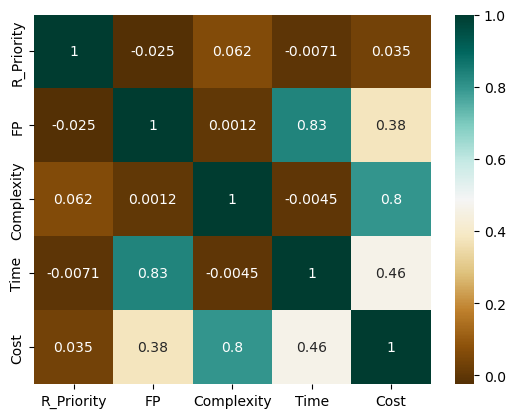

In [446]:
heatcol = dataset.corr()
sns.heatmap(heatcol,cmap="BrBG",annot=True)

# **K-Means**

In [447]:
from sklearn.cluster import KMeans

In [448]:
kmeans = KMeans(n_clusters=3, random_state=0,max_iter=50)
dataset['Class'] = kmeans.fit_predict(dataset[['Complexity', 'Time', 'Cost']] )

In [449]:
score_avg = silhouette_score(X, dataset['Class'])
print(f"Score: {score_avg}")

Score: 0.48674762232922003


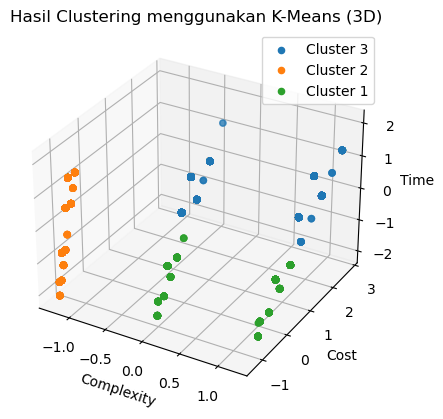

In [450]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for cluster_num in dataset['Class'].unique():
    cluster_data = dataset[dataset['Class'] == cluster_num]
    ax.scatter(
        cluster_data['Complexity'], 
        cluster_data['Cost'], 
        cluster_data['Time'], 
        label=f'Cluster {cluster_num + 1}')

ax.set_xlabel('Complexity')
ax.set_ylabel('Cost')
ax.set_zlabel('Time')
ax.legend()
plt.title('Hasil Clustering menggunakan K-Means (3D)')
plt.show()

**Split Data**

In [451]:
X_train, X_test = train_test_split(dataset, test_size=0.2, random_state=42)

In [452]:
dataset.to_csv('data/kmeans/data-preprocess.csv', index=False)

X_train.to_csv('data/kmeans/data-train.csv', index=False)
X_test.to_csv('data/kmeans/data-test.csv', index=False)

In [453]:
dataset.drop(['Class'], axis=1, inplace=True)

# **Hierarchical**

In [454]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg_clustering.fit(X)

dataset['Class'] = agg_clustering.labels_


In [455]:
silhouette = silhouette_score(X, dataset['Class'])
print(f"Score: {silhouette}")

Score: 0.44229176122404473


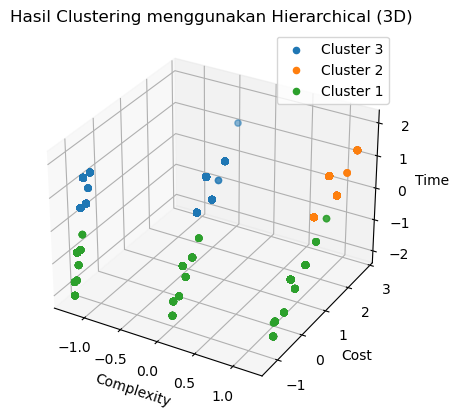

In [456]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for cluster_num in dataset['Class'].unique():
    cluster_data = dataset[dataset['Class'] == cluster_num]
    ax.scatter(
        cluster_data['Complexity'], 
        cluster_data['Cost'], 
        cluster_data['Time'], 
        label=f'Cluster {cluster_num + 1}')

ax.set_xlabel('Complexity')
ax.set_ylabel('Cost')
ax.set_zlabel('Time')
ax.legend()
plt.title('Hasil Clustering menggunakan Hierarchical (3D)')
plt.show()

**Split Data**

In [457]:
X_train, X_test = train_test_split(dataset, test_size=0.2, random_state=42)

In [458]:
dataset.to_csv('data/hierarchical/data-preprocess.csv', index=False)

X_train.to_csv('data/hierarchical/data-train.csv', index=False)
X_test.to_csv('data/hierarchical/data-test.csv', index=False)

In [459]:
dataset.drop(['Class'], axis=1, inplace=True)

# **Spectral**

In [460]:
from sklearn.cluster import SpectralClustering

spectral_clustering = SpectralClustering(n_clusters=3, eigen_solver='arpack', affinity="rbf")
spectral_clustering.fit(X)

dataset['Class'] = spectral_clustering.labels_

In [461]:
silhouette = silhouette_score(X, dataset['Class'])
print(f"Score: {silhouette}")

Score: 0.46919752754066224


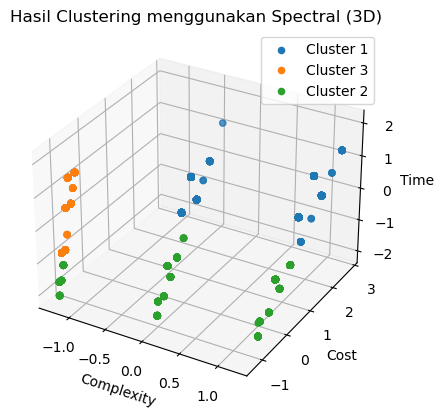

In [462]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for cluster_num in dataset['Class'].unique():
    cluster_data = dataset[dataset['Class'] == cluster_num]
    ax.scatter(
        cluster_data['Complexity'], 
        cluster_data['Cost'], 
        cluster_data['Time'], 
        label=f'Cluster {cluster_num + 1}')

ax.set_xlabel('Complexity')
ax.set_ylabel('Cost')
ax.set_zlabel('Time')
ax.legend()
plt.title('Hasil Clustering menggunakan Spectral (3D)')
plt.show()

**Split Data**

In [463]:
X_train, X_test = train_test_split(dataset, test_size=0.2, random_state=42)

In [464]:
dataset.to_csv('data/spectral/data-preprocess.csv', index=False)

X_train.to_csv('data/spectral/data-train.csv', index=False)
X_test.to_csv('data/spectral/data-test.csv', index=False)